In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import pydicom
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df= pd.read_csv("data/stage_2_train.csv")
train_df.head(8)

,ID,Label
0,ID_12cadc6af_epidural,0
1,ID_12cadc6af_intraparenchymal,0
2,ID_12cadc6af_intraventricular,0
3,ID_12cadc6af_subarachnoid,0
4,ID_12cadc6af_subdural,0
5,ID_12cadc6af_any,0
6,ID_38fd7baa0_epidural,0
7,ID_38fd7baa0_intraparenchymal,0


In [4]:
train_df["Label"].unique()

array([0, 1], dtype=int64)

In [5]:
train_df["sub_type"] = train_df["ID"].apply(lambda x:x.split("_")[-1])
train_df["file_id"] = train_df["ID"].apply(lambda x: "_".join(x.split("_")[:2])+".dcm")
train_df.head(10)

,ID,Label,sub_type,file_id
0,ID_12cadc6af_epidural,0,epidural,ID_12cadc6af.dcm
1,ID_12cadc6af_intraparenchymal,0,intraparenchymal,ID_12cadc6af.dcm
2,ID_12cadc6af_intraventricular,0,intraventricular,ID_12cadc6af.dcm
3,ID_12cadc6af_subarachnoid,0,subarachnoid,ID_12cadc6af.dcm
4,ID_12cadc6af_subdural,0,subdural,ID_12cadc6af.dcm
5,ID_12cadc6af_any,0,any,ID_12cadc6af.dcm
6,ID_38fd7baa0_epidural,0,epidural,ID_38fd7baa0.dcm
7,ID_38fd7baa0_intraparenchymal,0,intraparenchymal,ID_38fd7baa0.dcm
8,ID_38fd7baa0_intraventricular,0,intraventricular,ID_38fd7baa0.dcm
9,ID_38fd7baa0_subarachnoid,0,subarachnoid,ID_38fd7baa0.dcm


In [6]:
train_df.shape

(4516842, 4)

In [7]:
train_df["sub_type"].unique()

array(['epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid',
       'subdural', 'any'], dtype=object)

In [8]:
len(train_df["sub_type"].unique())

6

In [9]:
print("Number of train images: ", len(os.listdir("data/stage_2_train/")))

Number of train images:  752803


## Distribution of each hemorrage subtype

### Epidural

In [10]:
train_df[train_df["sub_type"] == "epidural"]["Label"].value_counts()

0    749662
1      3145
Name: Label, dtype: int64

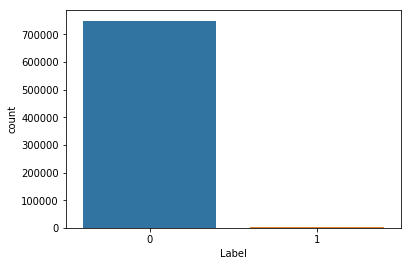

In [11]:
sns.countplot(x="Label", data = train_df[train_df["sub_type"]== "epidural"])

### Intraparenchymal

In [12]:
train_df[train_df["sub_type"] == "intraparenchymal"]["Label"].value_counts()

0    716689
1     36118
Name: Label, dtype: int64

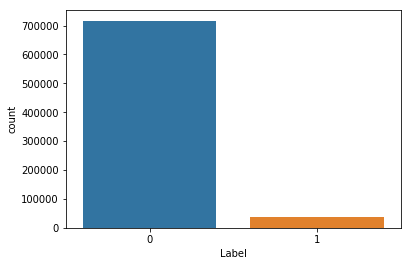

In [13]:
sns.countplot(x= "Label", data = train_df[train_df["sub_type"] == "intraparenchymal"])

### Intraventricular

In [14]:
train_df[train_df["sub_type"] == "intraventricular"]["Label"].value_counts()

0    726602
1     26205
Name: Label, dtype: int64

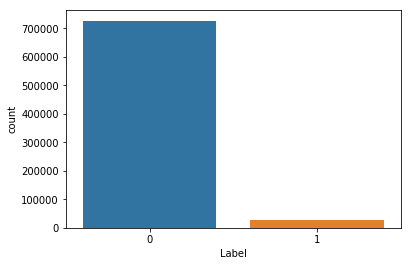

In [15]:
sns.countplot(x = "Label", data = train_df[train_df["sub_type"] == "intraventricular"])

### Subarachnoid

In [16]:
train_df[train_df["sub_type"] == "subarachnoid"]["Label"].value_counts()

0    717132
1     35675
Name: Label, dtype: int64

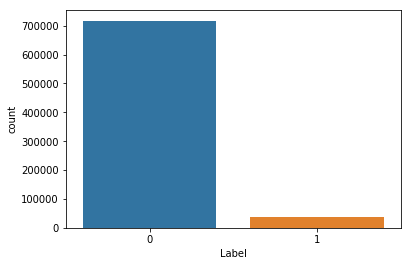

In [17]:
sns.countplot(x = "Label", data = train_df[train_df["sub_type"] == "subarachnoid"])

### Subdural

In [18]:
train_df[train_df["sub_type"] == "subdural"]["Label"].value_counts()

0    705641
1     47166
Name: Label, dtype: int64

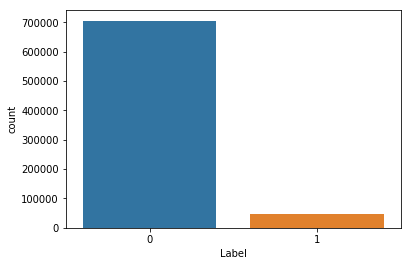

In [19]:
sns.countplot(x = "Label", data = train_df[train_df["sub_type"] == "subdural"])

### Any

In [20]:
train_df[train_df["sub_type"] == "any"] ["Label"].value_counts()

0    644874
1    107933
Name: Label, dtype: int64

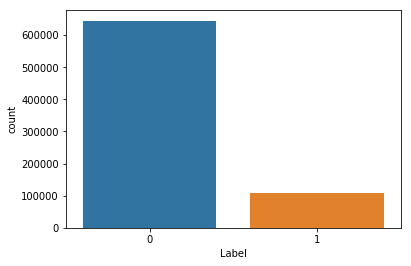

In [21]:
sns.countplot( x = "Label", data = train_df[train_df["sub_type"] == "any"])

[Text(0,0,'epidural'),
 Text(0,0,'intraparenchymal'),
 Text(0,0,'intraventricular'),
 Text(0,0,'subarachnoid'),
 Text(0,0,'subdural'),
 Text(0,0,'any')]

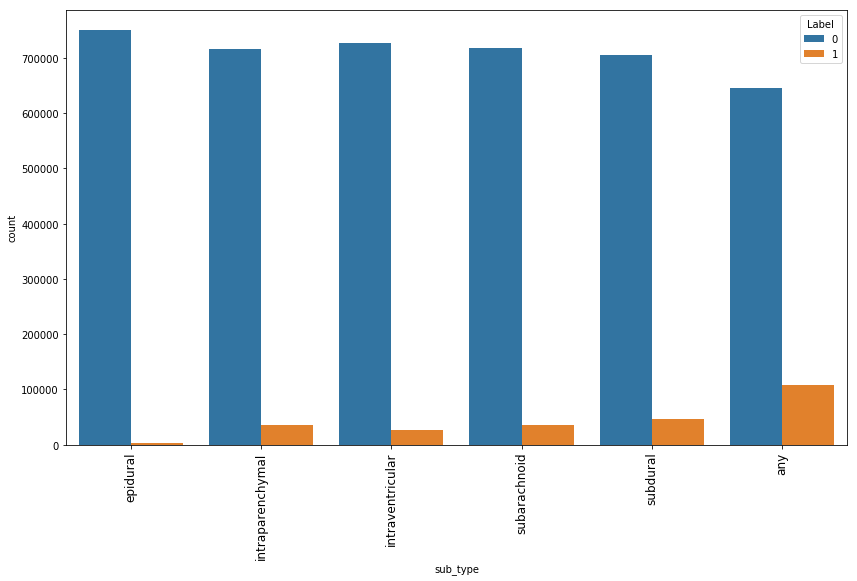

In [22]:
plt.figure(figsize = (14,8))
ax = plt.gca()
ax = sns.countplot(x = "sub_type", hue = "Label", data = (train_df))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 12)

## Modify the dataset

In [23]:
train_df.columns

Index(['ID', 'Label', 'sub_type', 'file_id'], dtype='object')

In [24]:
train_df = pd.pivot_table(train_df.drop(columns = "ID"), index = "file_id", columns = "sub_type", values= "Label")

In [25]:
train_df.head(10)

sub_type,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
file_id,,,,,,
ID_000012eaf.dcm,0,0,0,0,0,0
ID_000039fa0.dcm,0,0,0,0,0,0
ID_00005679d.dcm,0,0,0,0,0,0
ID_00008ce3c.dcm,0,0,0,0,0,0
ID_0000950d7.dcm,0,0,0,0,0,0
ID_0000aee4b.dcm,0,0,0,0,0,0
ID_0000ca2f6.dcm,0,0,0,0,0,0
ID_0000f1657.dcm,0,0,0,0,0,0
ID_000178e76.dcm,0,0,0,0,0,0


In [26]:
train_df.shape

(752803, 6)

### DICOM file visualization

In [31]:
ls "data/"

 Volume in drive D is Data
 Volume Serial Number is 080E-4FCD

 Directory of D:\rsna-intracranial-hemorrhage-detection\RSNA-Hemorrhage-Detection\data

02/25/2021  05:59 PM    <DIR>          .
02/25/2021  05:59 PM    <DIR>          ..
05/15/2020  01:24 AM        20,730,681 stage_2_sample_submission.csv
02/25/2021  05:59 PM    <DIR>          stage_2_test
02/25/2021  08:32 PM    <DIR>          stage_2_train
05/15/2020  05:21 AM       119,696,322 stage_2_train.csv
               2 File(s)    140,427,003 bytes
               4 Dir(s)  254,607,093,760 bytes free


In [32]:
train_path = "data/stage_2_train/"

In [35]:
dcm_img = pydicom.read_file(train_path + "ID_0000aee4b.dcm")
print(dcm_img)

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 10000000043370
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'RSNA Challenge 2019'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_0000aee4b
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_ce5f0b6c'
(0020, 000d) Study Instance UID                  UI: ID_9aad90e421
(0020, 000e) Series Instance UID                 UI: ID_1e59488a44
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: [-108.5, 14.5, 94]
(0020, 0037) Image Orientation (Patient)         DS: [1, 0, 0, 0, 1, 0]
(0028, 0002) Samples p

In [38]:
dcm_img[("0028", "1050")]

(0028, 1050) Window Center                       DS: [00036, 00036]

In [43]:
# extract value
dcm_img[('0028', '1050')].value

[00036, 00036]

In [44]:
def get_dicom_field_value(key, dicom):
    """
    @param key: key is tuple
    @param dicom: dicom file
    """
    return dicom[key].value

In [49]:
win_center = get_dicom_field_value(('0028', '1050'), dcm_img)
win_width = get_dicom_field_value(('0028', '1051'), dcm_img)
win_intercept = get_dicom_field_value(('0028', '1052'), dcm_img)
win_slope = get_dicom_field_value(('0028', '1053'), dcm_img)
win_center, window_width, window_intercept, window_slope

([00036, 00036], [00080, 00080], "-1024.0", "1.0")

## Constructing image from DICOM images
### Extracting window width, Window center, slop and intercept

In [53]:
def get_windowed_img(img, win_center, win_width, intercept, slope):
    img = (img*slope + intercept)
    img_min = win_center[0] - win_width[0] // 2
    img_max = win_center[0] + win_width[0] //2
    img[img < img_min] = img_min
    img[img > img_max] = img_max
    return img

In [54]:
windowed_img = get_windowed_img (dcm_img.pixel_array, win_center, win_width, win_intercept, win_slope)
print(windowed_img)

[[-4. -4. -4. ... -4. -4. -4.]
 [-4. -4. -4. ... -4. -4. -4.]
 [-4. -4. -4. ... -4. -4. -4.]
 ...
 [-4. -4. -4. ... -4. -4. -4.]
 [-4. -4. -4. ... -4. -4. -4.]
 [-4. -4. -4. ... -4. -4. -4.]]


In [55]:
def scale_windowed_img(img):
    """
    1. Convert to float
    2. Rescale to 0-255
    3. Concert to uint8
    """
    img_2d = img.astype(float)
    img_2d_scaled = (np.maximum(img_2d, 0) / img_2d.max()) * 255.0
    img_2d_scaled = np.uint8 (img_2d_scaled)
    return img_2d_scaled    

In [56]:
scaled_img = scale_windowed_img(windowed_img)


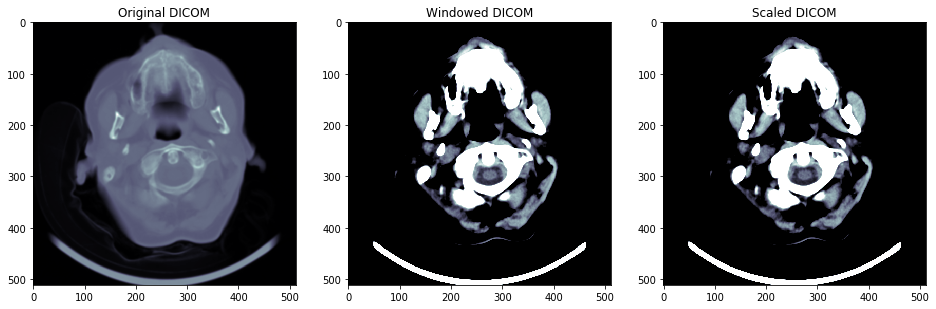

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 12))

ax1.set_title("Original DICOM")
ax1.imshow (dcm_img.pixel_array, cmap = "bone")

ax2.set_title("Windowed DICOM")
ax2.imshow(windowed_img, cmap = "bone")

ax3.set_title("Scaled DICOM")
ax3.imshow(scaled_img, cmap = "bone", vmin = 0, vmax = 255)